# 1. 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path_1 = "/content/drive/MyDrive/2024-1학기 데이터시각화/데이터시각화_기말과제_데이터/서울시 의원 표시과목별 현황.xlsx"
file_path_2 = "/content/drive/MyDrive/2024-1학기 데이터시각화/데이터시각화_기말과제_데이터/자치구별+1인당+지역내총생산+및+수준지수.xlsx"
import pandas as pd
df_1 = pd.read_excel(file_path_1)
df_2 = pd.read_excel(file_path_2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,기관수현황_지역별의원표시과목별_기관수현황(단위_개소)_2024년1분기,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,기준분기,시도,시군구,계,일반의,내과,신경과,정신건강의학과,외과,정형외과,...,소아청소년과,안과,이비인후과,피부과,비뇨의학과,영상의학과,병리과,진단검사의학과,재활의학과,가정의학과
2,202401,서울특별시,계,9803,2626,1265,56,571,230,663,...,459,464,710,552,269,42,4,2,187,210
3,202401,서울특별시,종로구,207,62,15,-,23,3,13,...,4,9,16,6,12,1,-,-,4,6
4,202401,서울특별시,중구,285,108,32,1,16,3,18,...,5,9,25,15,12,2,-,-,7,4


# 2. 서울시 의원 표시과목별 현황 데이터

In [ ]:
# row data 파악
df_1.head(5)

,기관수현황_지역별의원표시과목별_기관수현황(단위_개소)_2024년1분기,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,기준분기,시도,시군구,계,일반의,내과,신경과,정신건강의학과,외과,정형외과,...,소아청소년과,안과,이비인후과,피부과,비뇨의학과,영상의학과,병리과,진단검사의학과,재활의학과,가정의학과
2,202401,서울특별시,계,9803,2626,1265,56,571,230,663,...,459,464,710,552,269,42,4,2,187,210
3,202401,서울특별시,종로구,207,62,15,0,23,3,13,...,4,9,16,6,12,1,0,0,4,6
4,202401,서울특별시,중구,285,108,32,1,16,3,18,...,5,9,25,15,12,2,0,0,7,4


In [ ]:
# 데이터 전처리
df_hospital = df_1.iloc[2:, 2:] # 3번째 행, 3번째 열부터 시작
df_hospital.columns = df_1.iloc[1, 2:] # 2번째 행을 열이름으로 설정
df_hospital.replace('-', 0, inplace=True)
df_hospital.head(3)

1,시군구,계,일반의,내과,신경과,정신건강의학과,외과,정형외과,신경외과,심장혈관흉부외과,...,소아청소년과,안과,이비인후과,피부과,비뇨의학과,영상의학과,병리과,진단검사의학과,재활의학과,가정의학과
2,계,9803,2626,1265,56,571,230,663,104,12,...,459,464,710,552,269,42,4,2,187,210
3,종로구,207,62,15,0,23,3,13,3,1,...,4,9,16,6,12,1,0,0,4,6
4,중구,285,108,32,1,16,3,18,4,0,...,5,9,25,15,12,2,0,0,7,4


# 3. 자치구별 1인당 지역내총생산 데이터

In [ ]:
# raw data 파악
df_2.head(5)

,자치구별(1),자치구별(2),2021,2021.1,2021.2,2021.3,2021.4
0,자치구별(1),자치구별(2),지역내총생산(당해년가격) (백만원),구성비 (%),인구(추계인구) (명),1인당 지역내총생산 (천원),수준지수(서울특별시=100) (%)
1,서울시,소계,472040199,100,9501528,49680,100
2,NaN,종로구,35719537,7.6,149705,238599,480.27
3,NaN,중구,61342710,13,127427,481395,968.98
4,NaN,용산구,13294640,2.8,225647,58918,118.59


In [ ]:
df_grdp = df_2.iloc[1:, 1:] # 2번째 행, 2번째 열부터 시작
df_grdp.columns = df_2.iloc[0][1:] # 1번째 행을 열이름으로 설정
df_grdp.head(3)

,자치구별(2),지역내총생산(당해년가격) (백만원),구성비 (%),인구(추계인구) (명),1인당 지역내총생산 (천원),수준지수(서울특별시=100) (%)
1,소계,472040199,100,9501528,49680,100
2,종로구,35719537,7.6,149705,238599,480.27
3,중구,61342710,13,127427,481395,968.98


# 4. 두 데이터 프레임 합치기

In [ ]:
merged_df = pd.merge(df_hospital, df_grdp, left_on='시군구', right_on='자치구별(2)') # df_hospital 데이터프레임의 '시군구' 열과 df_grdp 데이터프레임의 '자치구별(2)' 열을 기준으로 두 데이터프레임 합치기
merged_df.drop('자치구별(2)', axis=1, inplace=True) # 중복되는 '자치구별(2)' 열 삭제
grouped_data = merged_df.groupby('시군구') # '시군구' 열 기준으로 나열

In [ ]:
merged_df.head(3)

,시군구,계,일반의,내과,신경과,정신건강의학과,외과,정형외과,신경외과,심장혈관흉부외과,...,영상의학과,병리과,진단검사의학과,재활의학과,가정의학과,지역내총생산(당해년가격) (백만원),구성비 (%),인구(추계인구) (명),1인당 지역내총생산 (천원),수준지수(서울특별시=100) (%)
0,종로구,207,62,15,0,23,3,13,3,1,...,1,0,0,4,6,35719537,7.6,149705,238599,480.27
1,중구,285,108,32,1,16,3,18,4,0,...,2,0,0,7,4,61342710,13,127427,481395,968.98
2,용산구,157,59,21,0,8,2,9,1,0,...,0,0,0,3,4,13294640,2.8,225647,58918,118.59


In [ ]:
type(merged_df)

pandas.core.frame.DataFrame

# 5. folium 라이브러리 활용하여 단계구분도 그리기(Not in Use)

In [ ]:
import folium

geo_json = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json" # 서울시 자치구 구분하는 공간정보 데이터

m = folium.Map(
    location = [37.566345, 126.977893] # 서울시청 위치 기준으로 줌인
)
folium.Choropleth(
    geo_data = geo_json, # 활용한 공간정보데이터
    name = 'choropleth', # 그래프 이름
    data = df_hospital, # 활용한 데이터 프레임
    key_on = 'feature.properties.name', # JSON 상에서 구분 기준이 되는 key
    columns = ["자치구별(2)",	"지역내총생산(당해년가격) (백만원)"], # 데이터프레임에서 활용하는 열
    fill_color = "YlGn", # 색
    fill_opacity = 0.7, # 색 채우기 투명도
    line_opacity = 0.2 # 경계선 투명도
).add_to(m)
m

# 6. 서울시 공간정보데이터 불러오기
- 대한민국 최신 행정구역(SHP) 다운로드: http://www.gisdeveloper.co.kr/?p=2332
- 위 링크에서 시군구(2023년 7월 업데이트) SHP 활용

In [ ]:
!pip install mapclassify

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm # plt에서 글자 깨짐 현상 해결하기 위해 사용
import mapclassify # 단계구분도 그릴 때 사용
gpd.__version__ # 0.13.2

'0.13.2'

### 1) 시군구 데이터 불러오기

- SIG 데이터는 GeoDataFrame으로, 공간정보 다룰 때 용이
- SIG.plot()을 통해 직교 좌표계에서 공간정보를 볼 수 있음

In [ ]:
SIG = gpd.read_file("/content/drive/MyDrive/2024-1학기 데이터시각화/데이터시각화_기말과제_데이터/sig.shp", encoding = 'cp949') # GeoPandas에서 shp 파일 읽기: gpd.read_file("파일이름.shp") # encoding = 'cp949'인 거 찾아냄
SIG.head(5) # geometry열은 꼭지점 정보의 집합

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.058 1952633.250, 964875.565 1..."


<Axes: >

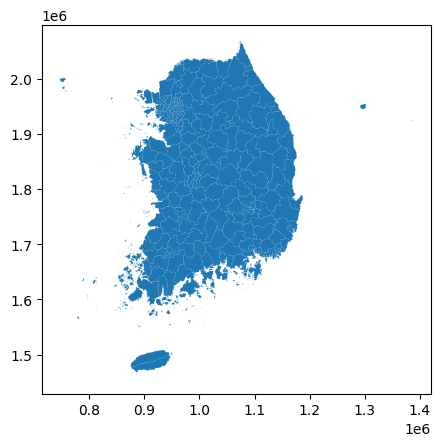

In [ ]:
type(SIG) # geopandas.geodataframe.GeoDataFrame
SIG.plot() # 대한민국 전체의 시군구 데이터

### 2) 시군구 데이터를 서울시로 제한
- 서울의 행정동 코드(SIG_CD)가 11로 시작하므로, 전국 데이터 중에서 서울시에 속하는 구 데이터만 가져오기

In [ ]:
seoul = SIG[SIG['SIG_CD'].str.startswith('11')] # 문자열 처리 후 11로 시작하는 행 추출
seoul.tail(5)

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
20,11620,Gwanak-gu,관악구,"POLYGON ((949438.997 1944127.713, 949456.647 1..."
21,11650,Seocho-gu,서초구,"POLYGON ((956982.039 1947144.037, 956982.518 1..."
22,11680,Gangnam-gu,강남구,"POLYGON ((959331.597 1948602.068, 959342.021 1..."
23,11710,Songpa-gu,송파구,"POLYGON ((965821.957 1949386.153, 965816.737 1..."
24,11740,Gangdong-gu,강동구,"POLYGON ((971595.075 1952405.815, 971596.036 1..."


Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


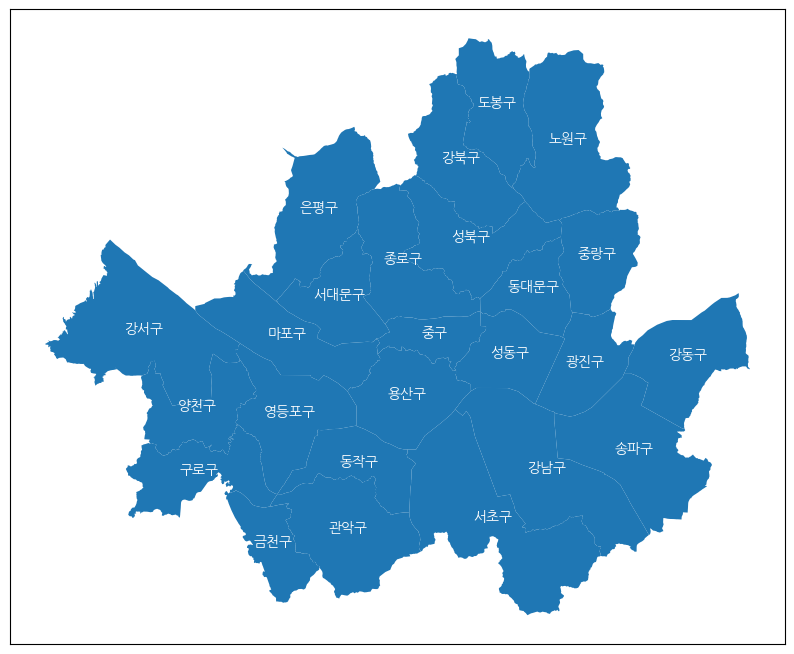

In [ ]:
# 서울시 지도 그리기
seoul.plot(figsize=(10,10))

# 그래프에서 x축과 y축 틱 제거하기
plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

# 그래프 제목 글씨가 안 보이는 문제를 해결하기 위해 선행되어야 하는 코드
import matplotlib.font_manager as fm  # 폰트 관리

!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') # 파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) # 폰트설정

# 구 이름 채워넣기
for idx, row in seoul.iterrows():
  plt.annotate(row['SIG_KOR_NM'], xy=row.geometry.centroid.coords[0], ha='center')

# 구 이름 추가설정
plt.rcParams['font.size'] = 5 # 라벨 크기
plt.rcParams['text.color'] = 'white' # 라벨 색상

# 7. GeoPandas 활용하여 단계구분도 그리기(병원정보)

### 1) 두 데이터 프레임 합치기
- 공간데이터(seoul)와 서울시 의원 표시과목별 현황 데이터(df_hospital) 합치기



In [ ]:
seoul_gdf = seoul.merge(df_hospital, left_on = 'SIG_KOR_NM', right_on = '시군구')
seoul_gdf.drop('시군구', axis=1, inplace=True) # 중복되는 '시군구' 열 삭제

In [ ]:
seoul_gdf.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,계,일반의,내과,신경과,정신건강의학과,외과,...,소아청소년과,안과,이비인후과,피부과,비뇨의학과,영상의학과,병리과,진단검사의학과,재활의학과,가정의학과
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1...",207,62,15,0,23,3,...,4,9,16,6,12,1,0,0,4,6
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1...",285,108,32,1,16,3,...,5,9,25,15,12,2,0,0,7,4
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1...",157,59,21,0,8,2,...,9,6,10,9,3,0,0,0,3,4
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1...",252,54,39,2,16,4,...,20,11,23,14,6,1,0,0,4,7
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.058 1952633.250, 964875.565 1...",295,72,47,1,22,10,...,17,16,23,14,6,1,0,0,5,7


### 2) 그래프 상 글자 깨짐 현상 해결하기 위한 전처리

In [ ]:
# 그래프 제목 글씨가 안 보이는 문제를 해결하기 위해 선행되어야 하는 코드
import matplotlib.font_manager as fm  # 폰트 관리

!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') # 파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) # 폰트설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


### 3) 단계구분도 그려보기

- 단계구분도를 그리기 위해 mapclassify 라이브러리 사용
- 단계 구분 방법 중, 이 코드에서는 Quantile 단계 구분 방법 사용


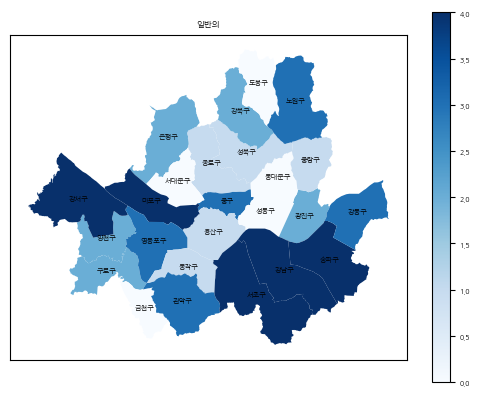

In [ ]:
# 자치구별 '일반의' 진료과목에 대응하는 단계구분도 그리기(임의로 '일반의' 진료과목에 대해 코드 작성해보기)
classification = mapclassify.Quantiles(seoul_gdf['일반의'], k=5) # k = 5를 통해 5개의 구간으로 나눔
seoul_gdf['class'] = classification.yb # seoul_gdf 데이터프레임에 'class'라는 열을 추가하고, 그 값으로 classification의 각 구간 번호(1~5) 할당
seoul_gdf.plot(column='class', cmap='Blues', legend=True) # 'class'열을 기준으로 단계별로 색상을 다르게 함, cmap = 'Blues'으로 색상 맵 지정, legend = True로 범례 표시

# 제목 달기
plt.title('일반의', fontsize = 10)

# 구 이름 설정
plt.rcParams['font.size'] = 5 # 라벨 크기
plt.rcParams['text.color'] = 'black' # 라벨 색상

# 구 이름 채워넣기
for idx, row in seoul.iterrows():
  plt.annotate(row['SIG_KOR_NM'], xy=row.geometry.centroid.coords[0], ha='center')

# 그래프에서 x축과 y축 틱 제거하기
plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

### 4) 표시과목별 단계구분도를 그리는 함수 생성

- 매개변수 x: 진료과목

In [ ]:
def classification(x):
  # 1) 단계구분도 그리기
  classification = mapclassify.Quantiles(seoul_gdf[x], k=5)
  seoul_gdf['class'] = classification.yb
  seoul_gdf.plot(column='class', cmap='Blues', legend=True)

  # 2) 제목 달기
  plt.title(f'서울시 자치구별 {x} 단계구분도', fontsize = 10)

  # 3) 그래프에서 x축과 y축 틱 제거하기
  plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

### 5) 모든 진료과목별 단계구분도 그리기(반복문)
- 진료과목 리스트를 department로 받아오기
- 진료과목 리스트에 대해 반복 진행

In [ ]:
# 진료과목 리스트
department = df_hospital.columns.tolist()[1:] # 열이름 불러오기, '시군구'와 '계' 열이름 제외하기 위해 인덱싱
department

['계',
 '일반의',
 '내과',
 '신경과',
 '정신건강의학과',
 '외과',
 '정형외과',
 '신경외과',
 '심장혈관흉부외과',
 '성형외과',
 '마취통증의학과',
 '산부인과',
 '소아청소년과',
 '안과',
 '이비인후과',
 '피부과',
 '비뇨의학과',
 '영상의학과',
 '병리과',
 '진단검사의학과',
 '재활의학과',
 '가정의학과']

/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 3.
  self.bins = quantile(y, k=k)
/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  self.bins = quantile(y, k=k)
/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  self.bins = quantile(y, k=k)
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:675: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


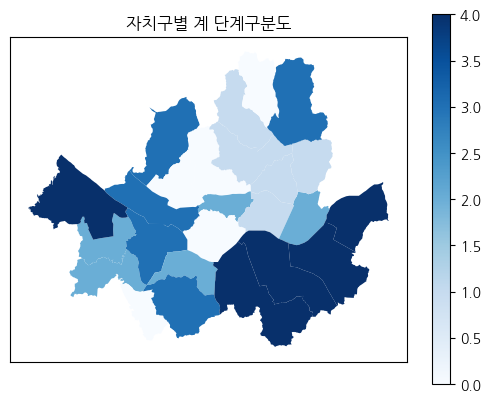

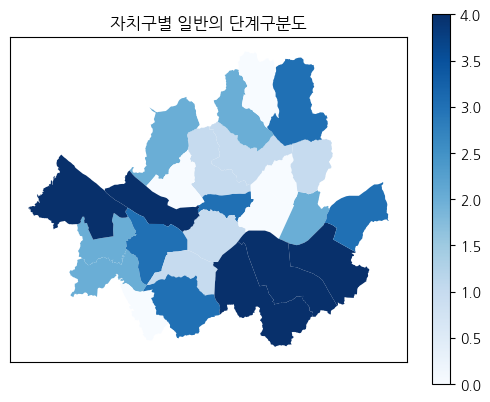

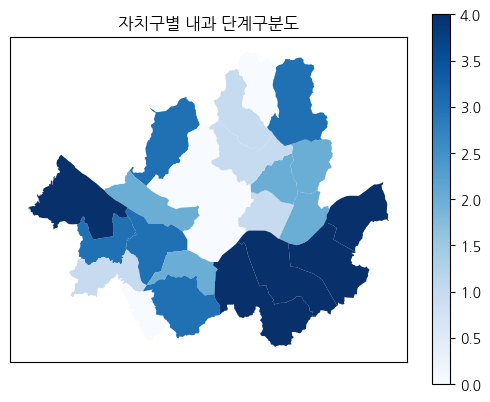

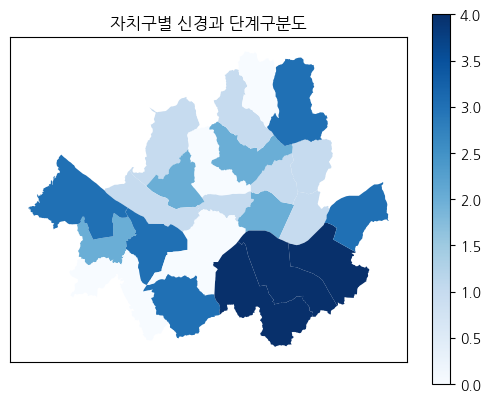

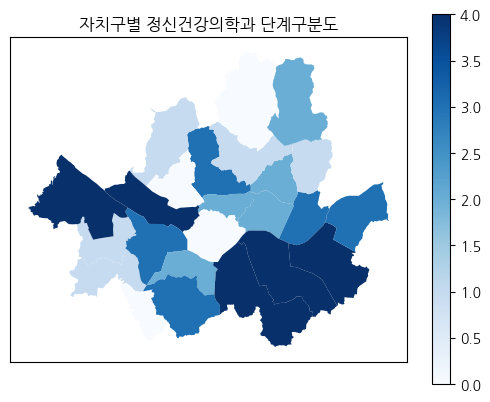

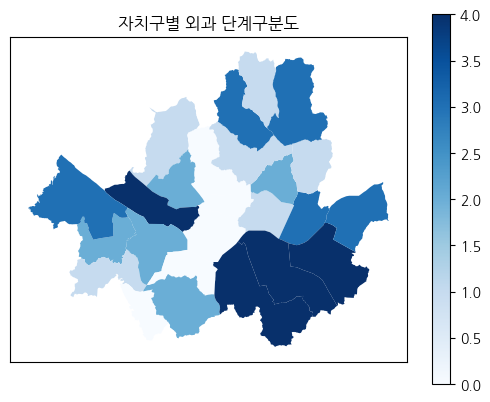

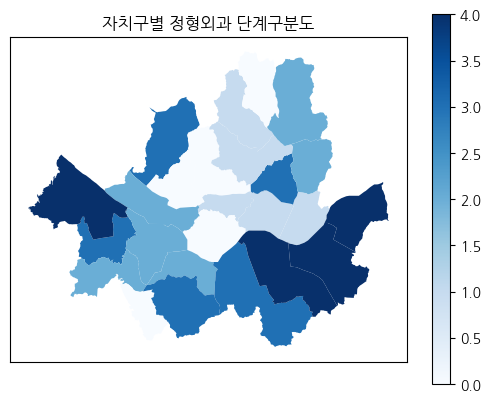

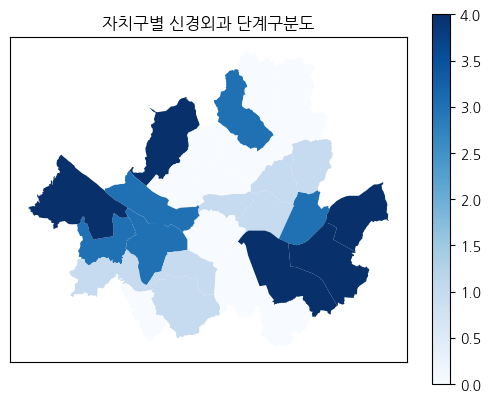

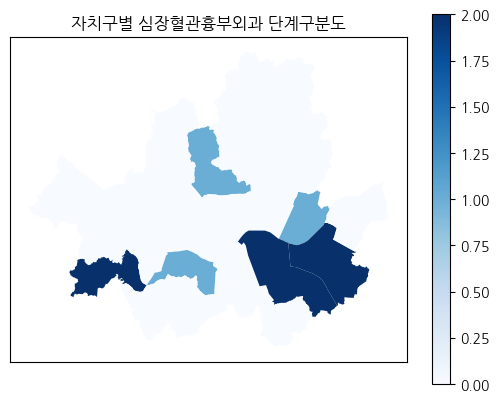

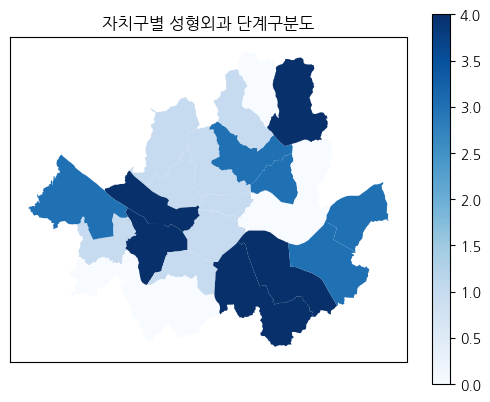

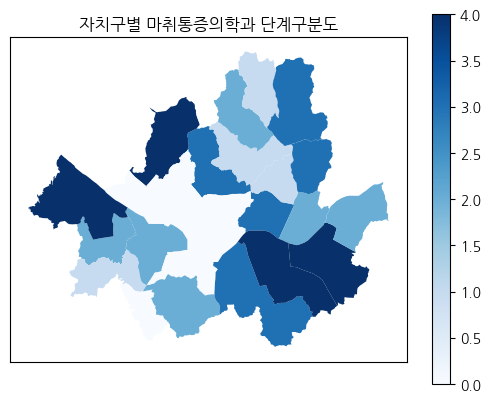

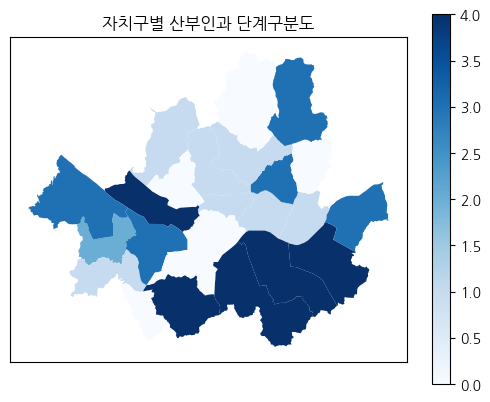

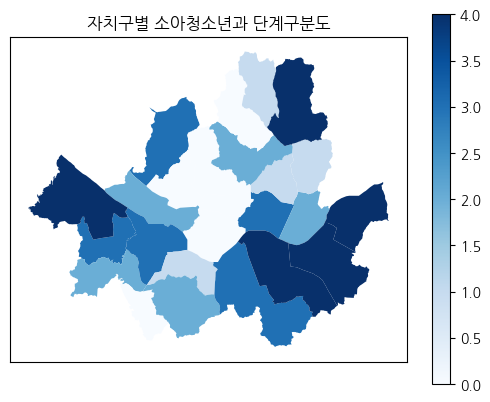

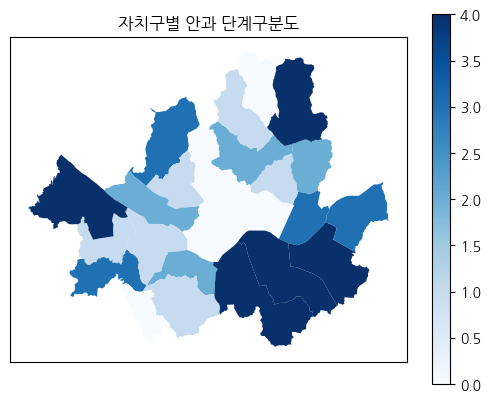

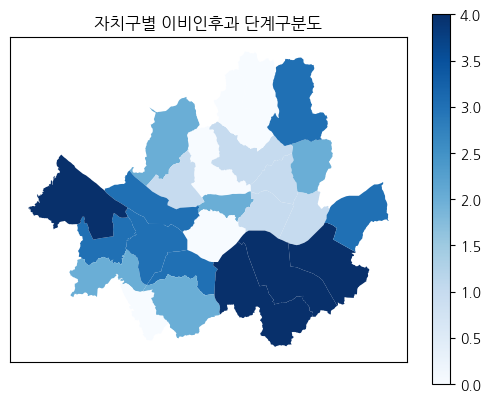

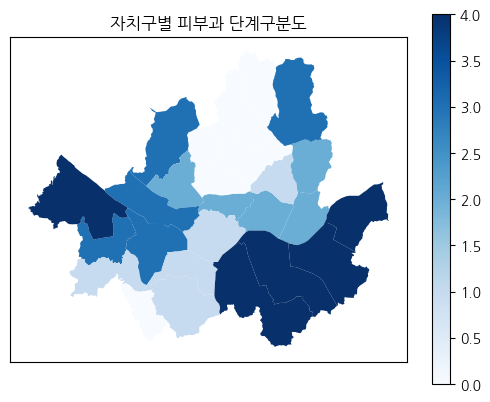

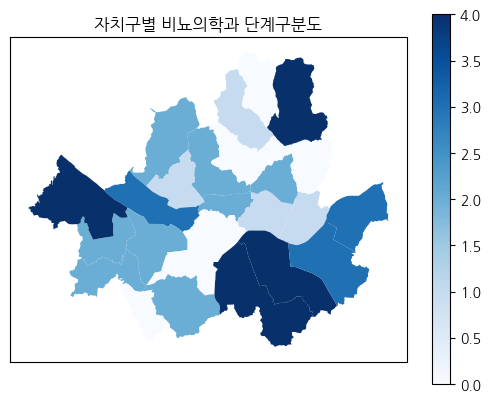

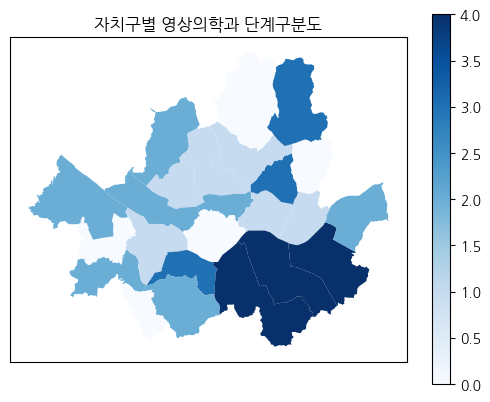

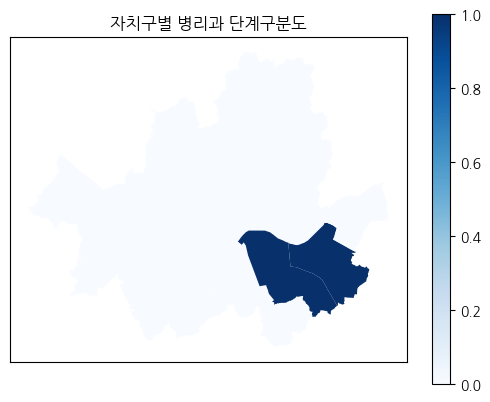

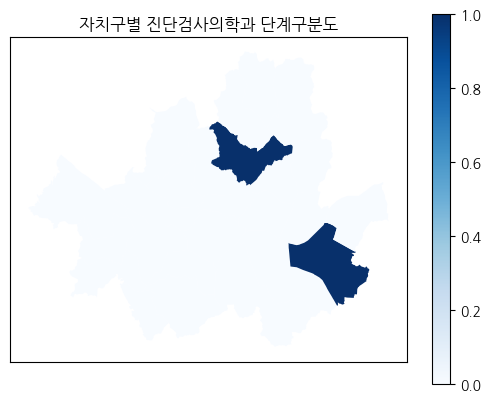

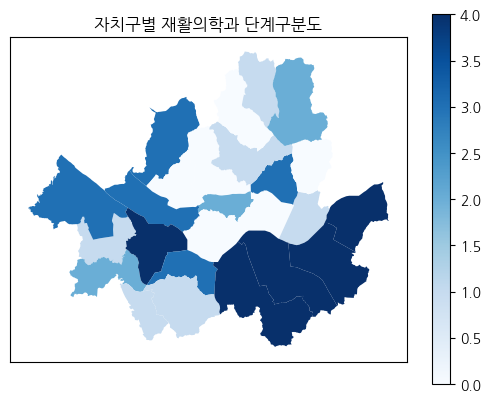

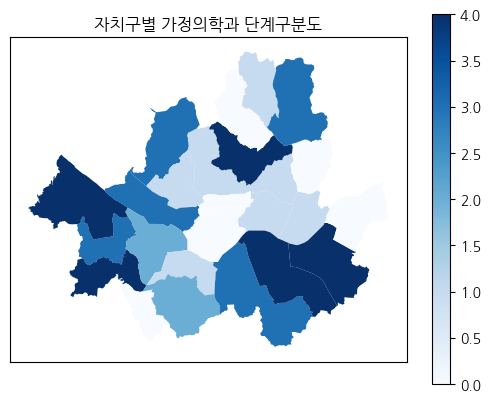

In [ ]:
# 반복문
for d in department:
  classification(d)

### [참고] Mapclassify 모듈의 속성
- Classifiers:
  - Eqaul_Interval
  - Quantiles
  - Fisher_Jenks
  - Headtail_Breaks
- Attributes
  - yb: 분류된 데이터의 구간 값
  - counts: 각 구간에 속하는 데이터의 개수
  - bins: 구간의 경계값
  - k: 구간의 개수
  - gadf: 일반화 분산 감소 계수

# 8. GeoPandas 활용하여 단계구분도 그리기(경제지표)
### 1) 두 데이터 프레임 합치기
- 공간데이터(seoul)와 서울시 의원 표시과목별 현황 데이터(df_hospital) 합치기



In [ ]:
seoul_gdf2 = seoul.merge(df_grdp, left_on = 'SIG_KOR_NM', right_on = '자치구별(2)')
seoul_gdf2.drop('자치구별(2)', axis=1, inplace=True) # 중복되는 '자치구별(2)' 열 삭제
seoul_gdf2.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,지역내총생산(당해년가격) (백만원),구성비 (%),인구(추계인구) (명),1인당 지역내총생산 (천원),수준지수(서울특별시=100) (%)
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1...",35719537,7.6,149705,238599,480.27
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1...",61342710,13,127427,481395,968.98
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1...",13294640,2.8,225647,58918,118.59
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1...",13999893,3,287580,48682,97.99
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.058 1952633.250, 964875.565 1...",6554954,1.4,349926,18732,37.71


### 2) 자치구별 지역내총생산 단계구분도 그리기

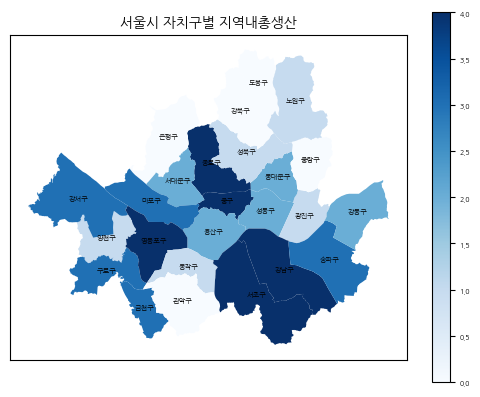

In [ ]:
classification = mapclassify.Quantiles(seoul_gdf2['지역내총생산(당해년가격) (백만원)'], k=5) # k = 5를 통해 5개의 구간으로 나눔
seoul_gdf['class'] = classification.yb # seoul_gdf 데이터프레임에 'class'라는 열을 추가하고, 그 값으로 classification의 각 구간 번호(1~5) 할당
seoul_gdf.plot(column='class', cmap='Blues', legend=True) # 'class'열을 기준으로 단계별로 색상을 다르게 함, cmap = 'Blues'으로 색상 맵 지정, legend = True로 범례 표시

# 제목 달기
plt.title('서울시 자치구별 지역내총생산', fontsize = 10)

# 구 이름 설정
plt.rcParams['font.size'] = 5 # 라벨 크기
plt.rcParams['text.color'] = 'black' # 라벨 색상

# 구 이름 채워넣기
for idx, row in seoul.iterrows():
  plt.annotate(row['SIG_KOR_NM'], xy=row.geometry.centroid.coords[0], ha='center')

# 그래프에서 x축과 y축 틱 제거하기
plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

### 3) 자치구별 1인당 지역내총생산 단계구분도 그리기

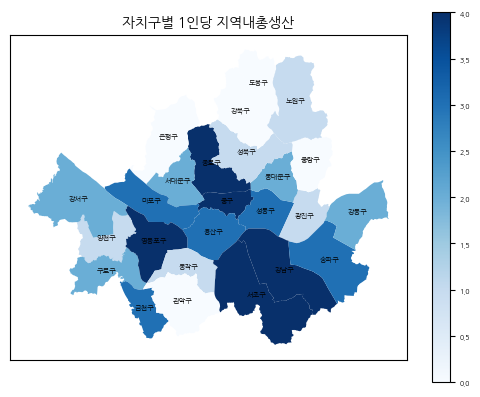

In [ ]:
classification = mapclassify.Quantiles(seoul_gdf2['1인당 지역내총생산 (천원)'], k=5) # k = 5를 통해 5개의 구간으로 나눔
seoul_gdf['class'] = classification.yb # seoul_gdf 데이터프레임에 'class'라는 열을 추가하고, 그 값으로 classification의 각 구간 번호(1~5) 할당
seoul_gdf.plot(column='class', cmap='Blues', legend=True) # 'class'열을 기준으로 단계별로 색상을 다르게 함, cmap = 'Blues'으로 색상 맵 지정, legend = True로 범례 표시

# 제목 달기
plt.title('서울시 자치구별 1인당 지역내총생산', fontsize = 10)

# 구 이름 설정
plt.rcParams['font.size'] = 5 # 라벨 크기
plt.rcParams['text.color'] = 'black' # 라벨 색상

# 구 이름 채워넣기
for idx, row in seoul.iterrows():
  plt.annotate(row['SIG_KOR_NM'], xy=row.geometry.centroid.coords[0], ha='center')

# 그래프에서 x축과 y축 틱 제거하기
plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

### 4) 자치구별 수준지수 단계구분도 그리기

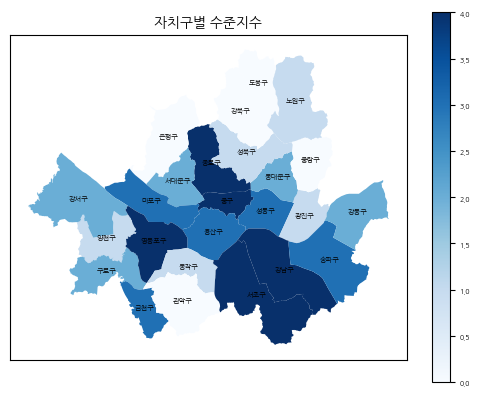

In [ ]:
classification = mapclassify.Quantiles(seoul_gdf2['수준지수(서울특별시=100) (%)'], k=5) # k = 5를 통해 5개의 구간으로 나눔
seoul_gdf['class'] = classification.yb # seoul_gdf 데이터프레임에 'class'라는 열을 추가하고, 그 값으로 classification의 각 구간 번호(1~5) 할당
seoul_gdf.plot(column='class', cmap='Blues', legend=True) # 'class'열을 기준으로 단계별로 색상을 다르게 함, cmap = 'Blues'으로 색상 맵 지정, legend = True로 범례 표시

# 제목 달기
plt.title('자치구별 수준지수', fontsize = 10)

# 구 이름 설정
plt.rcParams['font.size'] = 5 # 라벨 크기
plt.rcParams['text.color'] = 'black' # 라벨 색상

# 구 이름 채워넣기
for idx, row in seoul.iterrows():
  plt.annotate(row['SIG_KOR_NM'], xy=row.geometry.centroid.coords[0], ha='center')

# 그래프에서 x축과 y축 틱 제거하기
plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)